<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

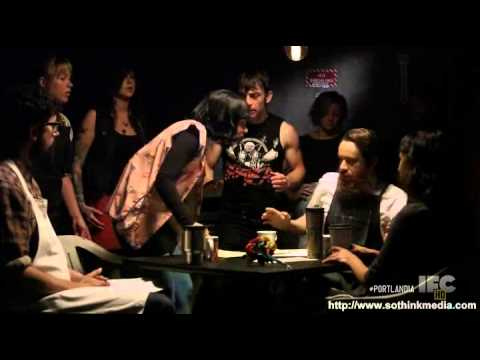

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
# import statements to be used in the following analysis

# Base
from collections import Counter
import re, string
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [1]:
%pwd

'/Users/flanuer/Downloads/Lambda/DS-Unit-4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [35]:
# import data from git repo where it came from, using pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [36]:
# using RegEx we can clean the data in the 'cull_review_text' from the dataset

# Taking a single element of the column to undestand cleaning necessities
s = shops['full_review_text'][0]
print(s)

# make note that there is excessive white space, punctuations, and numerical values that are not pertient
# to  tokenization

 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 


In [37]:
# using lamnda function to remove numericals, and white space

''.join([i for i in s if not i.isdigit()]).strip()

'//  check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?'

In [38]:
# general text cleaning function

def punct_cleaning(column):
    '''
    This function removes the following kinds of characters: numericals, punctuations.
    
    All upper case characters are changed to lower case to have more uniform set of tokens.
    '''
    
    processed_data = []                                              # new list to eppend cleaned elements
    
    for i in column:
        text = re.sub('[%s]' % string.punctuation, '', i).lower()    # elementwise punct/case cleaning
        text = ''.join([i for i in text if not i.isdigit()]).strip() # removing numericals, and remaining whitespace
        processed_data.append(text)                                  # appending elements to empty list
        
    return pd.DataFrame(processed_data)                              # converting new list to dataframe w/pd

In [40]:
shops['full_review_text'] = punct_cleaning(shops['full_review_text']) # applying punct_cleaning to 'full_review_text'
shops['full_review_text'][0]

'checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes  i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas'

In [31]:
# Instantiating spacy library for english language, and creating tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [69]:
STOP_WORDS = nlp.Defaults.stop_words.union(['a','and', '   ', '  ', ' ', 'coffee', 'ive', 'im', 'austin', 'the', 'try', 'be', 'this',])

In [48]:
# Tokenizer Pipe

tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [49]:
shops['tokens'].head()

0    [checkin, love, love, loved, atmosphere, corne...
1    [listed, date, night, ambiance, beautiful, lov...
2    [checkin, listed, brunch, spots, loved, eclect...
3    [cool, decor, good, drinks, nice, seating, ove...
4    [checkin, located, northcross, mall, shopping,...
Name: tokens, dtype: object

In [51]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('place', 5426),
 ('good', 3975),
 ('great', 3919),
 ('like', 3089),
 ('checkin', 1966),
 ('love', 1935),
 ('time', 1884),
 ('food', 1869),
 ('nice', 1741),
 ('shop', 1696)]

In [52]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [53]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
113,place,3659,5426,1.0,0.015694,0.015694,0.480436
164,good,2789,3975,2.0,0.011497,0.027191,0.366203
66,great,2836,3919,3.0,0.011335,0.038527,0.372374
144,like,2124,3089,4.0,0.008935,0.047461,0.278887
14,checkin,1960,1966,5.0,0.005686,0.053148,0.257353


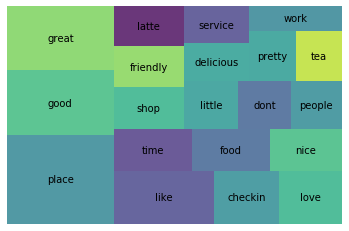

In [54]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

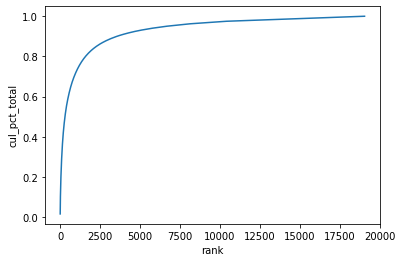

In [55]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [65]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False) and (token.lemma_ != '-PRON-')):
            lemmas.append(token.lemma_)
    
    return lemmas

In [66]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [67]:
wc = count(shops['lemmas'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
108,place,3888,6044,1.0,0.017357,0.017357,0.510504
154,good,3602,5410,2.0,0.015536,0.032893,0.472952
102,not,3055,5175,3.0,0.014861,0.047754,0.401129
65,great,2853,3946,4.0,0.011332,0.059086,0.374606
134,like,2260,3351,5.0,0.009623,0.068709,0.296744


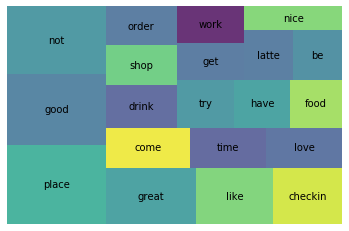

In [68]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [64]:
shops['lemmas']

0       [checkin, love, love, love, atmosphere, corner...
1       [list, date, night, austin, ambiance, austin, ...
2       [checkin, list, brunch, spot, love, eclectic, ...
3       [cool, decor, good, drink, nice, seating,  ,  ...
4       [checkin, locate, northcross, mall, shopping, ...
5       [checkin, cute, cafe, think, moment, step, not...
6       [checkin, list, nuptial, coffee, bliss, anders...
7       [checkin, love, place,   , star, cleanliness, ...
8       [checkin, ok, let, try, approach,  , pro, musi...
9       [checkin, place, show, social, medium, day, fi...
10      [checkin, list, americano, average, cute, stud...
11      [store, decoration, honestly, coffee, good, co...
12      [checkin, list,   , time, charm, factory, deco...
13      [cute, little, cafe, have, drive, place, time,...
14      [beautiful, eccentric, coffee, shop, library, ...
15      [checkin, list, search, fantastic, coffee, not...
16      [love, atmosphere, frequent, coffee, shop, def...
17      [check

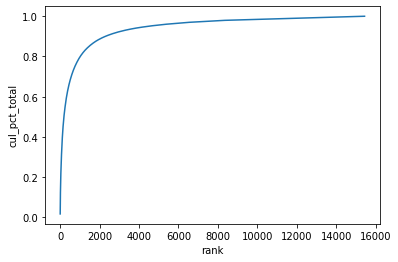

In [70]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [71]:

# Remove 'star rating' and float point from star_rating
shops["star_rating"] = shops["star_rating"].apply(lambda x: x.strip('.0 star rating'))

# Convert star_rating to int
shops["star_rating"] = shops["star_rating"].astype(int)


In [72]:

# Overall Token count:
good = shops[shops['star_rating'] >= 4]
bad = shops[shops['star_rating'] < 4]

In [73]:
good_wc = count(good['lemmas'])
bad_wc = count(bad['lemmas'])

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


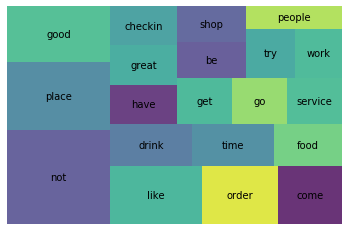

In [74]:

# Create visualization for 1-3 star 

wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

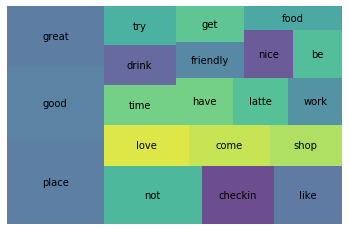

In [75]:

# Create visualization for 4 & 5 ratings

wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show();

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

